In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows',None)

In [3]:
traffic = pd.read_csv('traffic.csv', sep = ';')

In [4]:
traffic

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"
5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"10,9"
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,3"
7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,2"
8,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"7,6"
9,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,4"


In [5]:
traffic['Slowness in traffic (%)'][:10]

0     4,1
1     6,6
2     8,7
3     9,2
4    11,1
5    10,9
6     8,3
7     8,2
8     7,6
9     6,4
Name: Slowness in traffic (%), dtype: object

In [6]:
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',','.')

In [7]:
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

In [8]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hour (Coded)                           135 non-null    int64  
 1   Immobilized bus                        135 non-null    int64  
 2   Broken Truck                           135 non-null    int64  
 3   Vehicle excess                         135 non-null    int64  
 4   Accident victim                        135 non-null    int64  
 5   Running over                           135 non-null    int64  
 6   Fire vehicles                          135 non-null    int64  
 7   Occurrence involving freight           135 non-null    int64  
 8   Incident involving dangerous freight   135 non-null    int64  
 9   Lack of electricity                    135 non-null    int64  
 10  Fire                                   135 non-null    int64  
 11  Point 

In [9]:
traffic['Slowness in traffic (%)'].describe()

count    135.000000
mean      10.051852
std        4.363243
min        3.400000
25%        7.400000
50%        9.000000
75%       11.850000
max       23.400000
Name: Slowness in traffic (%), dtype: float64

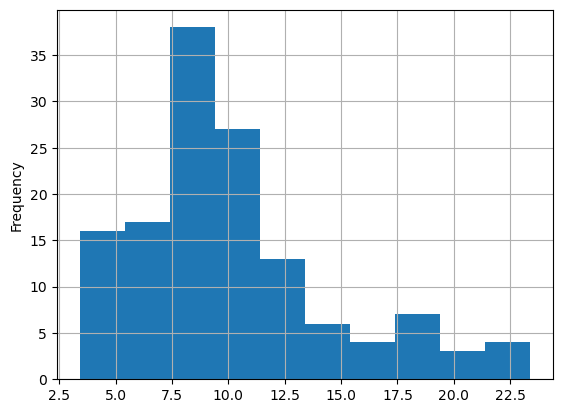

In [10]:
traffic['Slowness in traffic (%)'].plot.hist()
plt.grid()
plt.show()

In [11]:
traffic['Slowness in traffic (%)'].value_counts(bins = 10)

(7.4, 9.4]      36
(9.4, 11.4]     27
(5.4, 7.4]      21
(3.379, 5.4]    16
(11.4, 13.4]    11
(13.4, 15.4]     6
(15.4, 17.4]     6
(17.4, 19.4]     5
(21.4, 23.4]     4
(19.4, 21.4]     3
Name: Slowness in traffic (%), dtype: int64

In [12]:
traffic['Slowness in traffic (%)'].value_counts(bins = 10, normalize = True)*100

(7.4, 9.4]      26.666667
(9.4, 11.4]     20.000000
(5.4, 7.4]      15.555556
(3.379, 5.4]    11.851852
(11.4, 13.4]     8.148148
(13.4, 15.4]     4.444444
(15.4, 17.4]     4.444444
(17.4, 19.4]     3.703704
(21.4, 23.4]     2.962963
(19.4, 21.4]     2.222222
Name: Slowness in traffic (%), dtype: float64

In [13]:
incident = traffic.drop(["Hour (Coded)","Slowness in traffic (%)"], axis = 1)

In [14]:
factors = incident.sum().sort_values(ascending = False)

In [15]:
x = factors.index

In [16]:
y = factors.values

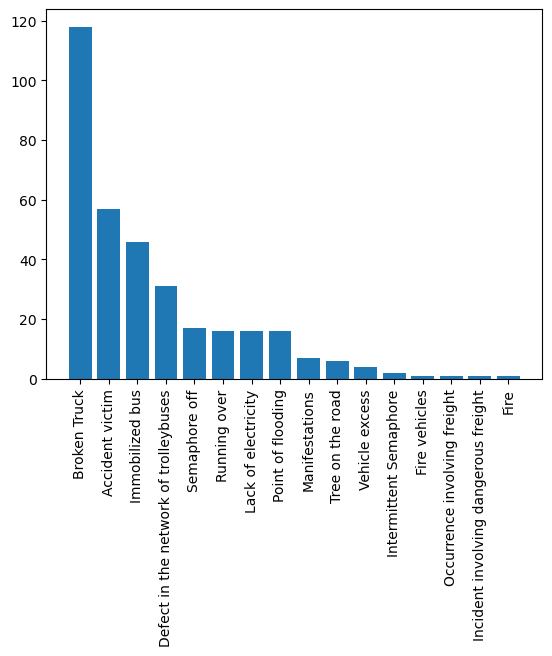

In [20]:
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()

In [18]:
selected = traffic.drop(["Hour (Coded)"], axis = 1)

selected_columns = selected.columns
selected_columns

Index(['Immobilized bus', 'Broken Truck', 'Vehicle excess', 'Accident victim',
       'Running over', 'Fire vehicles', 'Occurrence involving freight',
       'Incident involving dangerous freight', 'Lack of electricity', 'Fire',
       'Point of flooding', 'Manifestations',
       'Defect in the network of trolleybuses', 'Tree on the road',
       'Semaphore off', 'Intermittent Semaphore', 'Slowness in traffic (%)'],
      dtype='object')

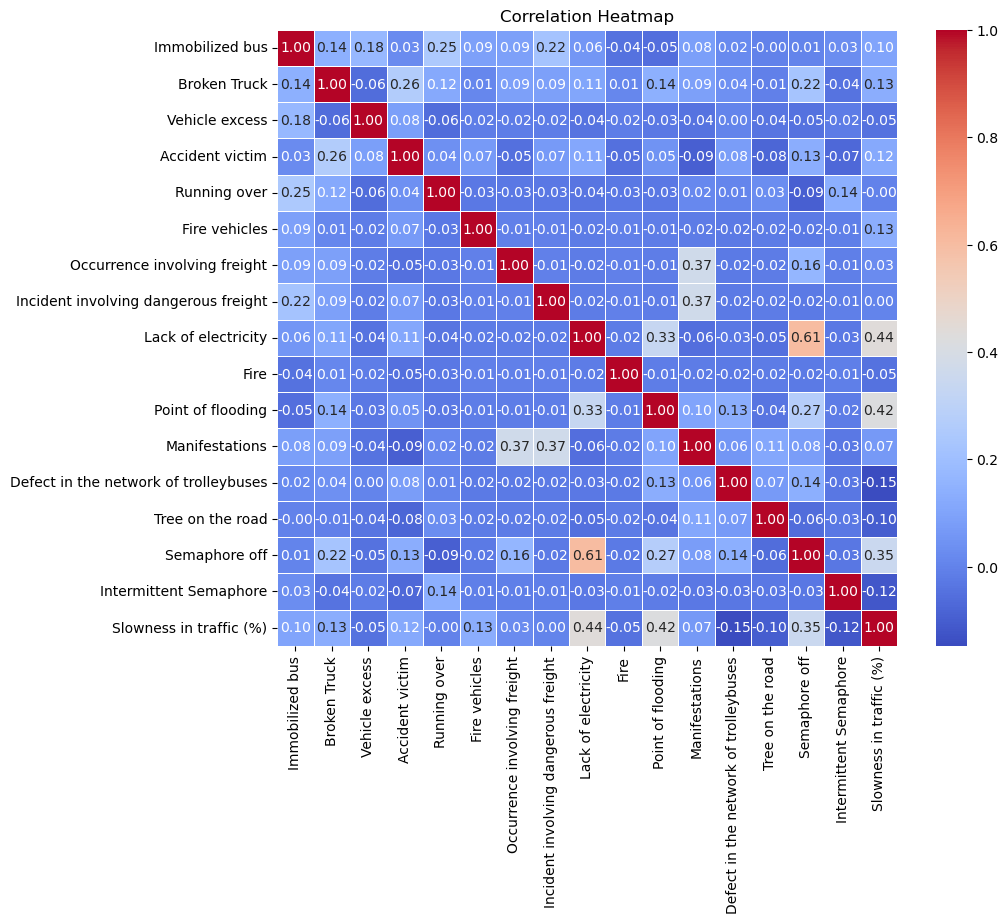

In [22]:
correlation_matrix = traffic[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()